# Creating adversarial examples with `SecML`

<a href="https://colab.research.google.com/drive/1Axu4W7HWS_UOjYXJSOa9N58bsJrUGqmp" target="_blank">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab">
</a>

Return to the [castle](https://github.com/Nkluge-correa/teeny-tiny_castle).

Adversarial machine learning is a specialized area within machine learning dedicated to creating algorithms and techniques capable of resisting and effectively responding to adversarial attacks. This field aims to enhance the robustness of models by understanding potential vulnerabilities and developing strategies to mitigate risks posed by malicious inputs and adversarial intent.

In this notebook we will be exploring a type of attack called evasion attacks. But _what is evasion?_ Evasion attacks happen when the network is fed an "_adversarial example_", i.e., a carefully perturbed input that looks the same as its untampered copy to a human — but that completely throws off the ML model.

![image](<https://cdn.vox-cdn.com/thumbor/uXLBjJlvk7QNC_HfXbkThG3sHPs=/0x0:652x316/1200x800/filters:focal(274x106:378x210):no_upscale()/cdn.vox-cdn.com/uploads/chorus_image/image/58191589/adversarial_patch_.0.gif>)

[Source](https://www.theverge.com/2018/1/3/16844842/ai-computer-vision-trick-adversarial-patches-google)

The attacks performed in this notebook are done using the [SecML](https://gitlab.com/secml/secml) package. 🤗

To start let us create an artifical dataset and a classifier to accompany it.

In [1]:
!pip install secml -q

seed = 42

from secml.data.loader import CDLRandomBlobs

dataset = CDLRandomBlobs(n_features=2,
                         centers=[[-2, 0], [2, -2], [2, 2]],
                         cluster_std=0.8,
                         n_samples=1100,
                         random_state=seed).load()

from secml.data.splitter import CTrainTestSplit

splitter = CTrainTestSplit(
    train_size=int(dataset.X.shape[0] * 0.9), test_size=int(dataset.X.shape[0] * 0.1), random_state=seed)
tr, ts = splitter.split(dataset)

from secml.ml.features import CNormalizerMinMax

normilizer = CNormalizerMinMax()
tr.X = normilizer.fit_transform(tr.X)
ts.X = normilizer.transform(ts.X)

from secml.ml.classifiers import CClassifierSVM
from secml.ml.classifiers.multiclass import CClassifierMulticlassOVA
from secml.ml.kernels import CKernelRBF

model = CClassifierMulticlassOVA(CClassifierSVM, kernel=CKernelRBF())

from secml.data.splitter import CDataSplitterKFold

validation_splitter = CDataSplitterKFold(num_folds=3, random_state=seed)

from secml.ml.peval.metrics import CMetricAccuracy

metric = CMetricAccuracy()

hyper_params = {'C': [0.01, 0.1, 1], 'kernel.gamma': [10, 100, 1000]}

print("Hypertunning...")
best_params = model.estimate_parameters(
    dataset=tr,
    parameters=hyper_params,
    splitter=validation_splitter,
    metric='accuracy',
    perf_evaluator='xval'
)

print(f'''
Hypertunning Complete.
Results: C = {best_params['C']}, kernel.gamma = {best_params['kernel.gamma']}.''')

model.fit(tr.X, tr.Y)

y_pred = model.predict(ts.X)
score = metric.performance_score(y_true=ts.Y, y_pred=y_pred)
print(f"\nAccuracy: {round(score, 2) * 100}%.")

from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(list(ts.Y), list(y_pred))

import plotly.express as px
fig = px.imshow(matrix,
                labels=dict(x="Predicted", y="True label"),
                x=['Class 1', 'Class 2', 'Class 3'],
                y=['Class 1', 'Class 2', 'Class 3'],
                text_auto=True
                )
fig.update_xaxes(side='top')
fig.update_layout(template='plotly_dark',
                  title='Confusion Matrix (SVM)',
                  coloraxis_showscale=False,
                  paper_bgcolor='rgba(0, 0, 0, 0)',
                  plot_bgcolor='rgba(0, 0, 0, 0)')
fig.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 464.0/464.0 kB 4.6 MB/s eta 0:00:00
2024-10-10 14:44:39,730 - secml.settings - INFO - New `SECML_HOME_DIR` created: /root/secml-data
2024-10-10 14:44:39,730 - secml.settings - INFO - New `SECML_HOME_DIR` created: /root/secml-data


INFO:secml.settings:New `SECML_HOME_DIR` created: /root/secml-data


2024-10-10 14:44:39,755 - secml.settings - INFO - Default configuration file copied to: /root/secml-data/secml.conf
2024-10-10 14:44:39,755 - secml.settings - INFO - Default configuration file copied to: /root/secml-data/secml.conf


INFO:secml.settings:Default configuration file copied to: /root/secml-data/secml.conf


2024-10-10 14:44:39,767 - secml.settings - INFO - New `SECML_DS_DIR` created: /root/secml-data/datasets
2024-10-10 14:44:39,767 - secml.settings - INFO - New `SECML_DS_DIR` created: /root/secml-data/datasets


INFO:secml.settings:New `SECML_DS_DIR` created: /root/secml-data/datasets


2024-10-10 14:44:39,783 - secml.settings - INFO - New `SECML_MODELS_DIR` created: /root/secml-data/models
2024-10-10 14:44:39,783 - secml.settings - INFO - New `SECML_MODELS_DIR` created: /root/secml-data/models


INFO:secml.settings:New `SECML_MODELS_DIR` created: /root/secml-data/models


2024-10-10 14:44:39,798 - secml.settings - INFO - New `SECML_EXP_DIR` created: /root/secml-data/experiments
2024-10-10 14:44:39,798 - secml.settings - INFO - New `SECML_EXP_DIR` created: /root/secml-data/experiments


INFO:secml.settings:New `SECML_EXP_DIR` created: /root/secml-data/experiments


2024-10-10 14:44:39,814 - secml.settings - INFO - New `SECML_LOGS_DIR` created: /root/secml-data/logs
2024-10-10 14:44:39,814 - secml.settings - INFO - New `SECML_LOGS_DIR` created: /root/secml-data/logs


INFO:secml.settings:New `SECML_LOGS_DIR` created: /root/secml-data/logs


2024-10-10 14:44:39,826 - secml.settings - INFO - New `SECML_PYTORCH_DIR` created: /root/secml-data/pytorch-data
2024-10-10 14:44:39,826 - secml.settings - INFO - New `SECML_PYTORCH_DIR` created: /root/secml-data/pytorch-data


INFO:secml.settings:New `SECML_PYTORCH_DIR` created: /root/secml-data/pytorch-data


Hypertunning...

Hypertunning Complete.
Results: C = 0.01, kernel.gamma = 10.

Accuracy: 100.0%.


Practically a perfect classifier. Now, we will create an adversarial example against the SVM classifier using the [gradient-based maximum-confidence algorithm](https://arxiv.org/abs/1708.06131). In SecML, we use this attack by calling the `CAttackEvasionPGDLS` class.

First, we define some attack parameters:

- `noise_type` refers to the type of perturbation (`l1` or `l2`).
- `dmax` (or "epsilon") refers to the perturbation size.
- `lb, ub` (lower bound and upper bound) refers to the bounds of the attack space. Since all samples are normalized between 0 and 1, this space (in this example) is 0, 1 (`None` for unbounded).
- `y_target` refers to the target of the attack (`None` for error-generic attacks, or a class label for error-specific attacks).

In [2]:
x0, y0 = ts[5, :].X, ts[5, :].Y

from secml.adv.attacks.evasion import CAttackEvasionPGDLS
pgd_ls_attack = CAttackEvasionPGDLS(
    classifier=model,
    double_init_ds=tr, #training set
    double_init=False,
    distance='l2',
    dmax=0.4,
    lb=0, ub=1,
    solver_params= {'eta': 0.3, 'eta_min': 0.1,'eta_max': None,'max_iter': 100, 'eps': 1e-4},
    y_target=None)

# Run the evasion attack on sample
y_pred_pgdls,_,adv_ds_pgdls,_ = pgd_ls_attack.run(x0, y0)
print(f"Original sample label: {y0.item()}." )
print(f"Adversarial example label: {y_pred_pgdls.item()}")
print(f"Nº of times the attack algorithm queries the classifier gradient function: {pgd_ls_attack.grad_eval}")

Original sample label: 0.
Adversarial example label: 1
Nº of times the attack algorithm queries the classifier gradient function: 8


Let us plot the effects of this perturbation on the classifier in terms of its decision boundary. The initial sample (the red hexagon) has been perturbed in feature space to be classified as a point from another class. The final adversarial example is the green star. The circle represents the `l2` constraint as a black circle (with the specified maximum perturbation `dmax`).

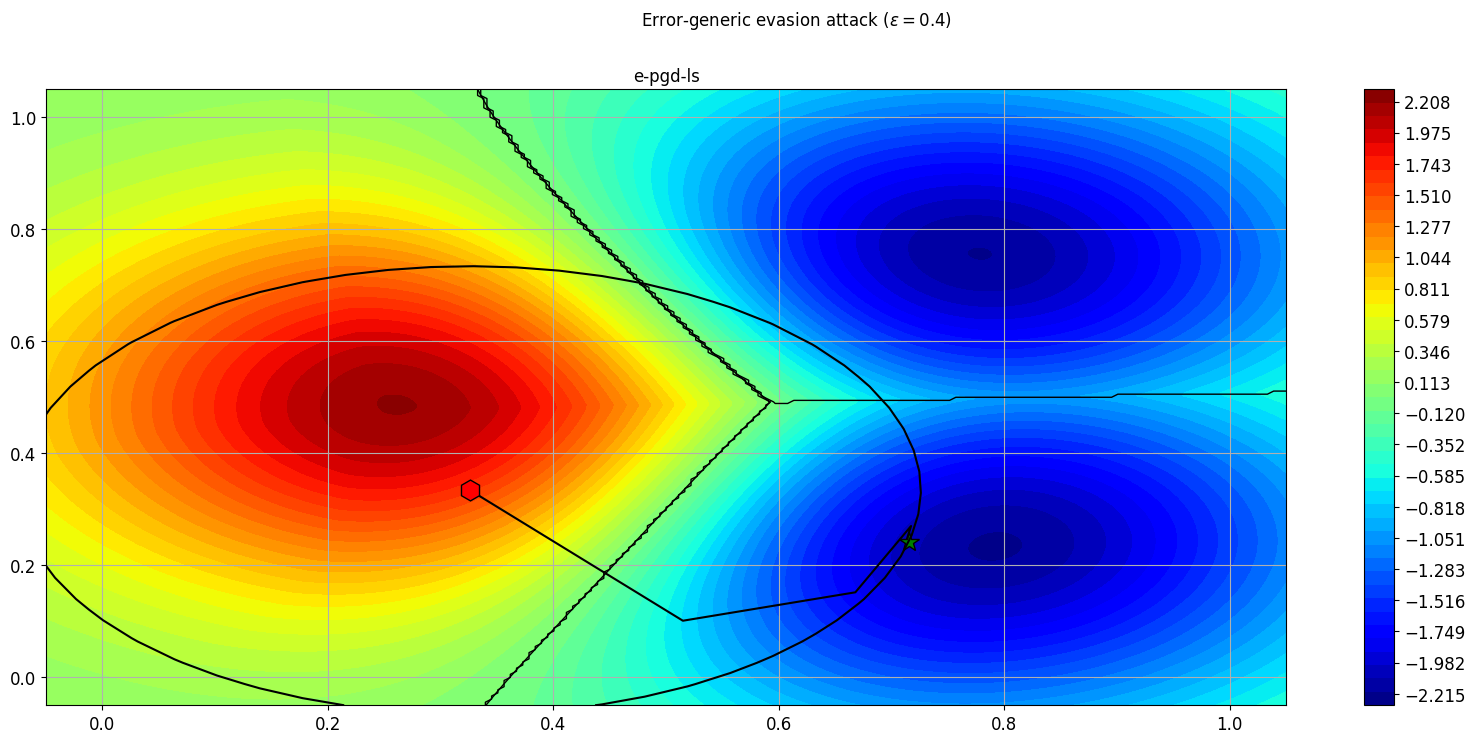

In [ ]:
from secml.figure import CFigure
%matplotlib inline

fig = CFigure(width=20, height=8, markersize=15)

from secml.optim.constraints import CConstraintL2
constraint = CConstraintL2(center=x0, radius=0.4)

for i, (attack, adv_ds) in enumerate([(pgd_ls_attack, adv_ds_pgdls)]):

    fig.subplot(i + 1)

    # Convenience function for plotting the attack objective function
    fig.sp.plot_fun(attack.objective_function, plot_levels=True,
                    multipoint=True, n_grid_points=200)

    # Let's also plot the decision boundaries of the classifier
    fig.sp.plot_decision_regions(model, plot_background=False, n_grid_points=200)

    # Construct an array with the original point and the adversarial example
    adv_path = x0.append(adv_ds.X, axis=0)

    fig.sp.plot_path(attack.x_seq)

    fig.sp.plot_constraint(constraint)

    fig.sp.title(attack.class_type)
    fig.sp.grid(grid_on=True)

fig.title(r"Error-generic evasion attack ($\varepsilon={:}$)".format(0.4))

fig.show()

Now, to evaluate the robustness of our classifier, we can increase the value for the maximum perturbation.


x0 CArray([[0.740499 1.005017]]) is outside of the given bounds.




Running security evaluation...


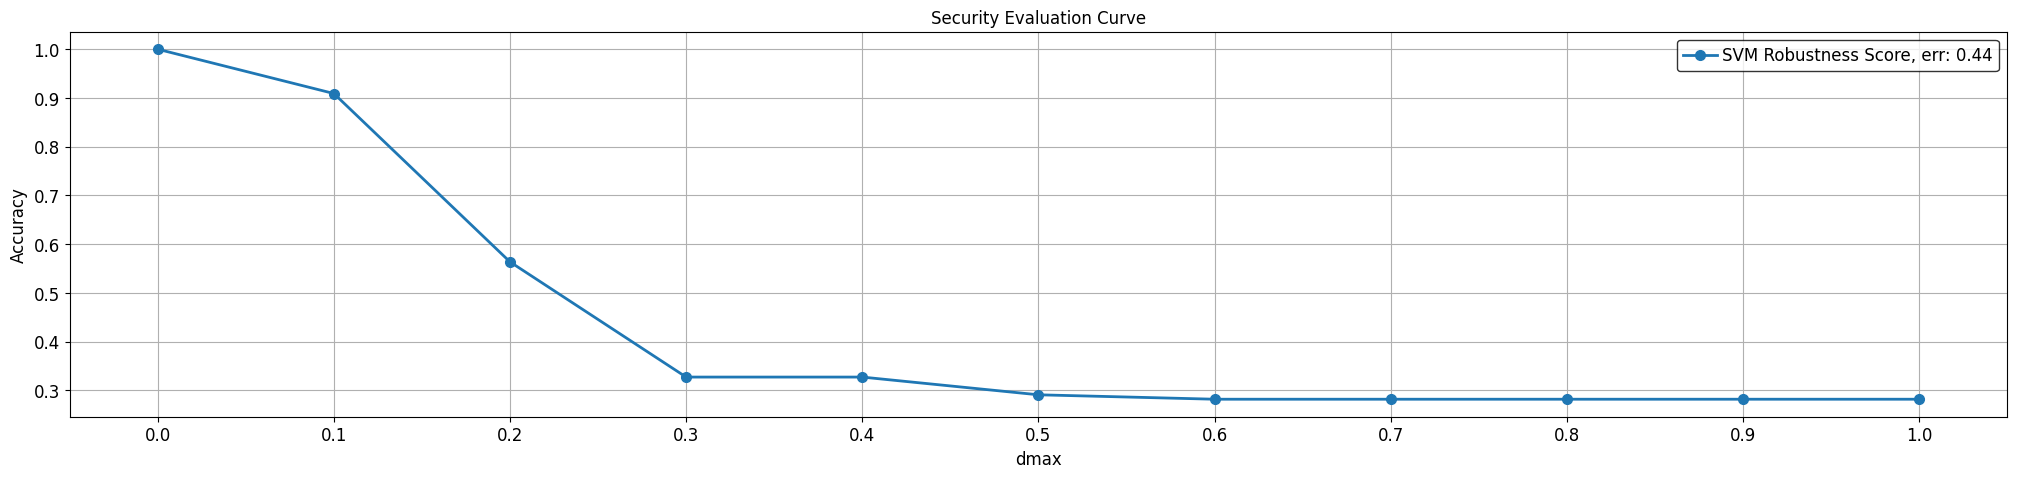

In [ ]:
# Perturbation boundaries
from secml.array import CArray
e_vals = CArray.arange(start=0, step=0.1, stop=1.1)

from secml.adv.seceval import CSecEval
sec_eval = CSecEval(attack=pgd_ls_attack, param_name='dmax', param_values=e_vals)

# Run evaluation on the test set
print("Running security evaluation...")
sec_eval.run_sec_eval(ts)

from secml.figure import CFigure
fig = CFigure(height=5, width=25)
fig.sp.plot_sec_eval(sec_eval.sec_eval_data, marker='o', label='SVM Robustness Score', show_average=True)

Most of the research in Ml evasion focuses on attacks created with small perturbations (the kind that are difficult for humans to perceive as attacks). And, as we can see, our SVM is quite vulnerable to adversarial attacks, even with small perturbations of $\epsilon$ = 0.3.

----

Return to the [castle](https://github.com/Nkluge-correa/teeny-tiny_castle).